# JOB ROLE PREDICTION USING RESUME

#### GOAL :- The goal is to predict the most suitable job role based on a candidate's resume

### Part -1 Analysis :

### 1. Import Necessary Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
warnings.filterwarnings("ignore")
import joblib

### 2. Import Data

In [7]:
# Loading Data
df = pd.read_csv("UpdatedResumeDataSet.csv")
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


### 3. Data Understanding

In [9]:
df.shape

(962, 2)

In [10]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB
None


In [12]:
df["Category"].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

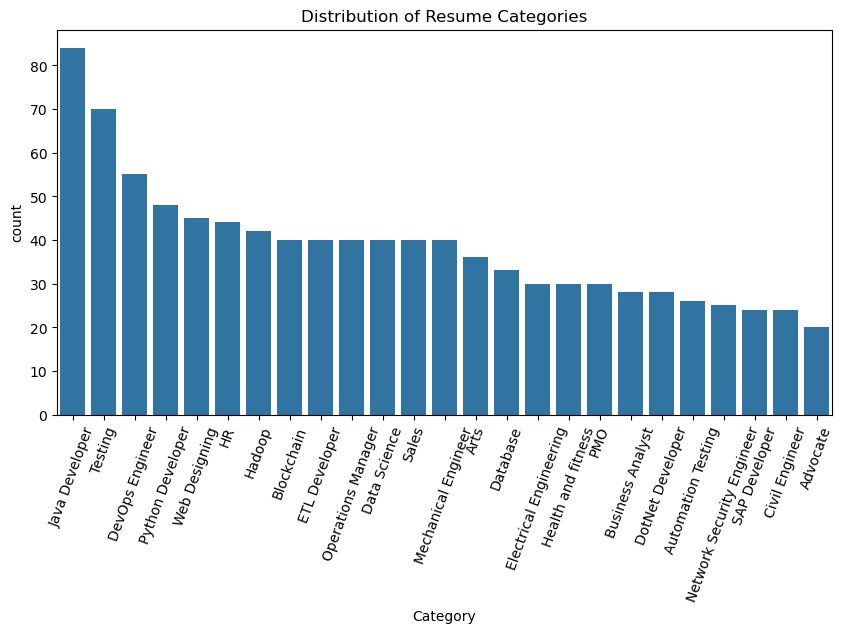

In [13]:
# Check category distribution
plt.figure(figsize=(10,5))
sns.countplot(x='Category', data=df, order=df['Category'].value_counts().index)
plt.xticks(rotation=70)
plt.title("Distribution of Resume Categories")
plt.show()

###  Data Preprocessing:

In [15]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [16]:

def clean_text(text):
    text = re.sub(r'http\S+|www\S+', '', str(text))  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters & punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    
    # Convert to lowercase and remove stopwords
    words = text.lower().split()
    words = [word for word in words if word not in stop_words]
    
    return ' '.join(words)

In [17]:

df['cleaned_resume'] = df['Resume'].apply(clean_text)
df['cleaned_resume']

0      skills programming languages python pandas num...
1      education details may may uitrgpv data scienti...
2      areas interest deep learning control system de...
3      skills r python sap hana tableau sap hana sql ...
4      education details mca ymcaust faridabad haryan...
                             ...                        
957    computer skills proficient ms office word basi...
958    willingness accept challenges positive thinkin...
959    personal skills quick learner eagerness learn ...
960    computer skills software knowledge mspower poi...
961    skill set os windows xp database mysql sql ser...
Name: cleaned_resume, Length: 962, dtype: object

### 4. Data Balancing

In [19]:
# Get the largest category size (i.e., the category with the maximum number of entries)
max_size = df['Category'].value_counts().max()
print("The resume that is having highest frequency = ",max_size)
print("="*50)

# Perform oversampling
balanced_df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)

# Shuffle the dataset to avoid any order bias
df = balanced_df.sample(frac=1).reset_index(drop=True)

# Check the balanced category distribution
print("\nBalanced Category Distribution (After Oversampling):")
print(df['Category'].value_counts())

The resume that is having highest frequency =  84

Balanced Category Distribution (After Oversampling):
Category
Network Security Engineer    84
Business Analyst             84
HR                           84
SAP Developer                84
Java Developer               84
Civil Engineer               84
Operations Manager           84
Hadoop                       84
Blockchain                   84
PMO                          84
Data Science                 84
Electrical Engineering       84
DevOps Engineer              84
Database                     84
Advocate                     84
DotNet Developer             84
Automation Testing           84
Python Developer             84
Mechanical Engineer          84
Arts                         84
Testing                      84
Sales                        84
ETL Developer                84
Health and fitness           84
Web Designing                84
Name: count, dtype: int64


In [20]:
balanced_df

,Category,Resume,cleaned_resume
0,Advocate,Skills: Natural Languages: Proficient in Engli...,skills natural languages proficient english hi...
1,Advocate,Education Details \r\nNovember 2016 to January...,education details november january llm masters...
2,Advocate,â¢ Hard working â¢ Quick learnerEducation De...,hard working quick learnereducation details ju...
3,Advocate,Skills Legal Writing Efficient researcher Lega...,skills legal writing efficient researcher lega...
4,Advocate,Education Details \r\nNovember 2016 to January...,education details november january llm masters...
...,...,...,...
2095,Web Designing,"IT SKILLS Languages: C (Basic), JAVA (Basic) W...",skills languages c basic java basic web techno...
2096,Web Designing,"Technical Skills Web Technologies: Angular JS,...",technical skills web technologies angular js h...
2097,Web Designing,Education Details \r\n B.C.A Bachelor Computer...,education details bca bachelor computer applic...
2098,Web Designing,Education Details \r\n B.C.A Bachelor Computer...,education details bca bachelor computer applic...


In [21]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_resume']).toarray()
y = df['Category']

In [22]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
y

0       Network Security Engineer
1                        Database
2              Health and fitness
3                   ETL Developer
4                           Sales
                  ...            
2095                        Sales
2096             DotNet Developer
2097                SAP Developer
2098                     Database
2099           Operations Manager
Name: Category, Length: 2100, dtype: object

In [24]:
df["cleaned_resume"][0]

'technical expertise cisco asa checkpoint firewall gaia splat palo alto firewalls firewall management tools cisco security management csm checkpoint smart center palo alto panorama f load balancer ltm networking hands cisco router cisco switches security management event management rsaenvision ticketing tools bmc remedy servicenow technologies software languages python vb scriptingeducation details january january bachelor engineering information technology mumbai maharashtra mumbai university senior network security analyst senior network security analyst accenture skill details firewalls exprience months cisco exprience months security exprience months firewall exprience months checkpoint exprience monthscompany details company accenture description install configure upgrades troubleshoot cisco asa firewalls x includes single multicontext firewalls f ltm configuration vip pools ssl offloading certificate renewals code upgrade troubleshoot issues pulse secure juniper management includ

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.20, random_state=13)

In [26]:
y_train

518                      Database
316     Network Security Engineer
822                            HR
16             Health and fitness
717               DevOps Engineer
                  ...            
153                         Sales
1780           Health and fitness
866               DevOps Engineer
74         Electrical Engineering
338                Civil Engineer
Name: Category, Length: 1680, dtype: object

In [27]:
X_train = pd.DataFrame(X_train, columns=vectorizer.get_feature_names_out())
X_train = pd.DataFrame(X_train)
X_train

,aaa,ab,abacus,abad,abap,abb,abilities,ability,able,abridged,...,york,young,yrs,zaggle,zenoss,zensar,zero,zhypility,zone,zz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.098451,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.077821,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.037288,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
train_df = X_train.copy()
train_df['Category'] = y_train.reset_index(drop=True)

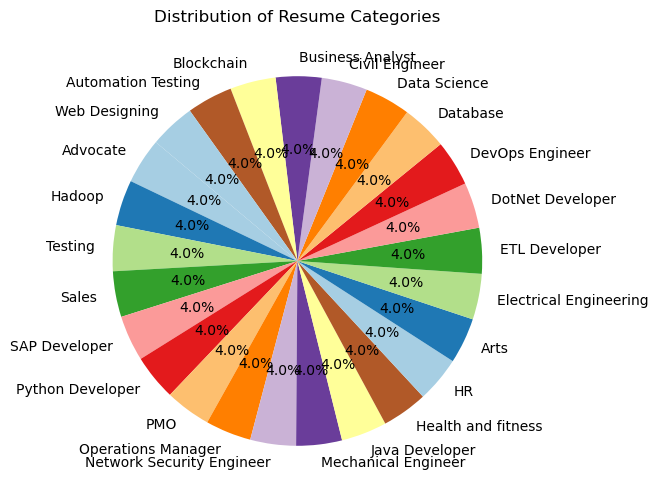

In [29]:
# Count occurrences of each category
category_counts = balanced_df['Category'].value_counts()

# Set figure size
plt.figure(figsize=(10, 6))

# Create pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Add title
plt.title("Distribution of Resume Categories")

# Show the plot
plt.show()

### Define hyperparameter grids

In [31]:
param_grids = {
        "Random Forest": {
        'n_estimators': [50, 100, 150],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    },
    "K-Nearest Neighbors": {
        'n_neighbors': [3, 5, 7, 9],
        'metric': ['euclidean', 'manhattan', 'minkowski'],
        'p': [1, 2]  # 1 for Manhattan, 2 for Euclidean
    },
    "Support Vector Machine": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    "Decision Tree": {
        'max_depth': [5, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
}

### Print all best parameters together

In [33]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Perform GridSearchCV and print best parameters
best_params = {}

for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=3, n_jobs=-1, verbose=1)
    grid_search.fit(X,y)
    best_params[name] = grid_search.best_params_

# Print all best parameters together
print("\n🔹 Best Hyperparameters for Each Model:")
for model_name, params in best_params.items():
    print(f"{model_name}: {params}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits

🔹 Best Hyperparameters for Each Model:
Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
K-Nearest Neighbors: {'metric': 'euclidean', 'n_neighbors': 3, 'p': 1}
Support Vector Machine: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Decision Tree: {'max_depth': 20, 'min_samples_split': 2}


## LogisticRegression

In [35]:
log=LogisticRegression()
log.fit(X_train,y_train)


LogisticRegression()

In [36]:
y_pred=log.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0


### RandomForestClassifier

#### n_estimators: Specifies the number of trees in the forest. More trees improve accuracy but increase computation time.
#### max_depth: Sets the maximum depth of each tree. A deeper tree captures more patterns but may overfit.
#### min_samples_split: Determines the minimum number of samples required to split a node. A higher value prevents overfitting by forcing the tree to generalize more.

In [39]:
rf = RandomForestClassifier(n_estimators=150, max_depth=10, min_samples_split=10, random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=150,
                       random_state=42)

In [40]:
y_pred=rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0


## KNN

#### n_neighbors: Defines the number of neighbors to consider when classifying a new data point. A lower value increases variance, while a higher value increases bias.
#### metric: Specifies the distance measurement used to find the nearest neighbors:
#### euclidean: Measures straight-line distance.
#### manhattan: Measures distance by summing absolute differences.
#### minkowski: A generalized form that can behave like both Euclidean and Manhattan distances.
#### p: Defines the power parameter for Minkowski distance:
#### p=1 → Manhattan distance.
#### p=2 → Euclidean distance.

In [43]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean', p=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3, p=1)

In [44]:
y_pred=knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0


## SVM

#### C: Controls the trade-off between margin width and classification accuracy. A smaller C allows more misclassification (simpler model), while a larger C tries to classify all points correctly (risk of overfitting).
#### kernel: Determines how the decision boundary is drawn:
#### linear: Uses a straight-line separation.
#### rbf: Maps data into a higher dimension to allow complex separation.
#### gamma: Controls how much influence a single training example has on the decision boundary:
#### scale: Adjusts automatically based on the dataset.
#### auto: Uses 1/n_features as the default value.

In [47]:
svm = SVC(C=1, kernel='linear', gamma='scale', random_state=42)
svm.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [48]:
y_pred=svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0


## DecisionTreeClassifier

#### max_depth: Specifies the maximum depth of the tree. A higher depth captures more details but increases the risk of overfitting.
#### min_samples_split: Sets the minimum number of samples required to split a node. Higher values create a more generalized model.

In [51]:
dt = DecisionTreeClassifier(max_depth=20, min_samples_split=2, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=42)

In [52]:
y_pred=dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8666666666666667


In [53]:
# Save Best Model
joblib.dump(rf, 'best_model.pkl')


['best_model.pkl']

In [54]:
# Save vectorizer to a file
joblib.dump(vectorizer, "vectorizer.pkl")

['vectorizer.pkl']

## CONCLUSION

#### By inspection of all the ML models RandomForestClassifier, SVM, KNN is giving more accuracy there for building model using SVM

In [57]:

# Function to predict the category of a resume
def pred(input_resume):
    # Preprocess the input text (e.g., cleaning, etc.)
    cleaned_text = clean_text(input_resume) 

    # Vectorize the cleaned text using the same TF-IDF vectorizer used during training
    vectorized_text = vectorizer.transform([cleaned_text])
    
    # Convert sparse matrix to dense
    vectorized_text = vectorized_text.toarray()

    # Prediction
    predicted_category = svm.predict(vectorized_text)

    # get name of predicted category
    predicted_category_name = predicted_category

    return predicted_category_name[0]  # Return the category name


In [58]:
myresume = """
Sarah Williams is a dedicated and skilled advocate with over 10 years of experience in providing legal representation to clients across various sectors, including criminal law, civil litigation, and family law. With a deep understanding of legal procedures and case law, Sarah has successfully handled numerous cases in the courtroom, negotiating favorable settlements and providing expert legal advice to individuals and businesses.

She holds a law degree from XYZ University and is a licensed attorney, practicing law in multiple jurisdictions. Sarah is passionate about ensuring justice is served and strives to make legal processes more accessible to her clients. She is known for her excellent research and analytical skills, attention to detail, and commitment to upholding the law with integrity.

Key Skills:
- Criminal Law
- Civil Litigation
- Family Law
- Contract Law
- Legal Research and Writing
- Courtroom Advocacy
- Legal Counseling and Advice
- Client Relationship Management
- Legal Compliance and Regulations
- Negotiation and Settlement

Certifications and Licenses:
- Licensed Attorney at Law, XYZ State Bar
- Certification in Criminal Law, XYZ University

Education:
JD in Law, XYZ University, 2010-2013

Professional Experience:
- Senior Advocate at ABC Law Firm (2016-Present)
- Associate Advocate at DEF Legal Group (2013-2016)

Languages:
- English (Fluent)
- Spanish (Conversational)
"""

# Now, test the model with the Advocate-focused resume
pred(myresume)


'Advocate'

In [59]:
myresume = """
John Doe is an experienced Network Security Engineer with over 7 years of expertise in designing, implementing, and managing network security infrastructures. Specializing in safeguarding critical network systems, John has worked with various organizations to protect against cyber threats, data breaches, and unauthorized access. He is proficient in deploying firewalls, intrusion detection systems (IDS), VPNs, and network monitoring tools to ensure the integrity and security of networks.

John holds a degree in Computer Science and certifications in several cybersecurity domains, including Certified Information Systems Security Professional (CISSP), Certified Ethical Hacker (CEH), and Cisco Certified Network Associate (CCNA). He has extensive experience in troubleshooting and resolving network vulnerabilities, and has played a key role in conducting security audits and risk assessments.

Key Skills:
- Network Security Architecture
- Firewall Management and Configuration
- Intrusion Detection and Prevention Systems (IDS/IPS)
- Virtual Private Networks (VPNs)
- Security Audits and Risk Assessments
- Cybersecurity Incident Response
- Network Monitoring and Traffic Analysis
- Vulnerability Assessment and Penetration Testing
- Data Encryption and Secure Communications

Certifications:
- CISSP (Certified Information Systems Security Professional)
- CEH (Certified Ethical Hacker)
- CCNA (Cisco Certified Network Associate)
- CompTIA Security+

Education:
BSc in Computer Science, XYZ University, 2012-2016

Professional Experience:
- Network Security Engineer at ABC Corp (2016-Present)
- IT Security Specialist at DEF Solutions (2014-2016)

Languages:
- English (Fluent)
- French (Intermediate)
"""

# Now, test the model with the Network Security Engineer-focused resume
pred(myresume)


'Network Security Engineer'

In [60]:
pip install --upgrade pdfplumber


In [86]:
import pdfplumber
pdfplumber.__version__

'0.11.5'

In [3]:

!pip install pdfplumber
